# DSCI6001 4.3 Lab

## A return to algorithms: Revisiting Recursion

(graded lab)

Today is in preparation for Friday's lab, the recursive calculation of the determinant. We shall revisit several classical problems using recursion. 



## TASK 1:

### Greatest common divisor (of three numbers)

This is a classic interview question. Suppose we want to find the greatest common divisor between two numbers, meaning that we want to find the largest number that evenly divides both numbers at the same time. This number can be found using the ancient algorithm that considers two numbers, $a$ where $a$ is a quotient and $b$ where $b$ is a remainder. The algorithm proceeds as follows:

$$a = q_{0}*b + r_{0}$$

$$b = q_{1}r_{0}+r_{1}$$

$$r_{0} = q_{2}r_{1}+r_{2}$$

$$ \vdots $$

$$ r_{N-1} = q_{N+1}r_{N}+0 $$

At the point that the last remainder hits $0$, the algorithm stops and returns the quotient. This quotient is ultimately the greatest common divisor. 


### Decomposing our task:

Your first step is to create a recursive algorithm that computes the gcd of only two numbers. 


### Writing the algorithm:

When we write a new algorithm it helps to proceed in a set of simple steps:
1) Outline the goal of the algorithm
2) Work through the steps of the algorithm as you believe them to be
3) Write out pseudocode describing those steps
4) Walk through the pseudocode by hand and see if you obtain the expected result


### Building a recursion:

#### Find the **base case**

In this case we know by definition what the base case is. It occurs when the last remainder $r_{N}$ goes to zero, leaving only the last nonzero remainder, $r_{N-1}$. This is the GCD, and so we return the remainder.

#### Find the **propagation case**

This consists of at least one step that returns the original function itself with some modified arguments. The arguments and base case should be modified such that the arguments definitely reach the base case. In the case of the GCD calculation we are looking for another GCD calculation, this time with the quotient as the remainder and the remainder being the remainder of the quotient and the last remainder.


#### Example:
One might write a recursive function that sums a list of numbers:

In [4]:
def sum(x):
    s = 0 # summand
    def loop(x,s): # we create another function to make this easy
        if len(x) == 0: # this is the base case. 
                        # we are knocking the size of the list down every step.
                        # once the list has no more components remaining in it we return the sum
            return s
        else:
            return loop(x[1:], s+x[0]) # This is the propagation case
    return loop(x, s)

sum([1,2,3,4,5])

15

(solution)

The gcd can be calculated as follows (note that there will be many cases wherein gcd==1.

In [47]:
#pass down modulus, 
#4 lines

def gcd(num1,num2):

    if num2==0:
        return num1
    
    else:
        #print(num1,'num1',num2,'num2')
        #print (gcd(num2, num1%num2) , 'function call')
        #print(num1%num2, 'moduluo')
        return gcd(num2, num1%num2)
    
    
    

In [48]:
gcd(130902349058234852348758023475899,9934582734057203487502347502435)

1

## TASK 2: 

### Print Pascal's triangle

Almost everyone is familiar with the concept of [Pascal's triangle](https://en.wikipedia.org/wiki/Pascal%27s_triangle). The triangle depicts the growth of the **Binomial coefficients**. Below we have provided a schema for printing the triangle, you need only figure out how to print out the numbers using recursion.

How to do it? There is one easy way, and it is found by looking at the entries of the triangle. Each entry (with the exception of certain sections of the triangle) is a sum of other parts. What are they? If you can name the indices and how they add together, you'll have the recursion and the base case right away.


In [58]:
def print_pascal(N):
    
    for r in range(N):
        
        rowstr = ''
        
        for c in range(0, r+1):
            
            rowstr += str(pascal(c, r))+' '
          
        print(rowstr+'\n')

In [89]:
def pascal(c, r):
    
    if c==r or c==0:
        return 1
    
    else:
        #print(pascal(c-1,r-1))
        #return pascal(c-1,r-1)
        
        #print(c, 'column')
        #print(r,'row')
        
        return (pascal(c,r-1) + pascal(c-1 , r-1))
    
        
    
    pass

print_pascal(7)

1 

1 1 

1 2 1 

1 3 3 1 

1 4 6 4 1 

1 5 10 10 5 1 

1 6 15 20 15 6 1 



## TASK 3 (extra credit): 

### Compute the Convex Hull of N randomly placed numbers

Compute the [convex hull using quickhull](https://en.wikipedia.org/wiki/Quickhull) of a set of random numbers placed within a uniform random interval in $\mathbb{R}^2$

In [112]:
from random import randint
random_numbers_x = [randint(1,100) for _ in range(100)]
random_numbers_y = [randint(1,100) for _ in range(100)]

#random_numbers_x

Populating the interactive namespace from numpy and matplotlib


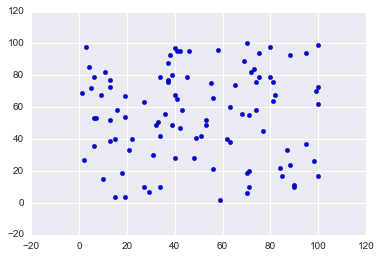

In [114]:
import seaborn as sns
%pylab inline
plt.scatter(random_numbers_x,random_numbers_y)
plt.show()

Find the points with minimum and maximum x coordinates, those are bound to be part of the convex hull.

Use the line formed by the two points to divide the set in two subsets of points, which will be processed recursively.
Determine the point, on one side of the line, with the maximum distance from the line. The two points found before along with this one form a triangle.
The points lying inside of that triangle cannot be part of the convex hull and can therefore be ignored in the next steps.
Repeat the previous two steps on the two lines formed by the triangle (not the initial line).
Keep on doing so on until no more points are left, the recursion has come to an end and the points selected constitute the convex hull.